In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
sns.set(style='whitegrid', color_codes=True)

In [5]:
cle = pd.read_csv('processed.cleveland.data.txt', header=None)

In [7]:
cle.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
hung = pd.read_csv('processed.hungarian.data.txt', header=None)

In [9]:
swi = pd.read_csv('processed.switzerland.data.txt', header=None)

In [10]:
va = pd.read_csv('processed.va.data.txt', header=None)

In [52]:
df = pd.concat([cle, hung, swi, va])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# Managing Data

In [25]:
df.columns = ['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs', 'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression', 'slope', 'fluoroscopy',
             'defect', 'diagnosis']

# make all values numeric and coerce all non-numeric to nan
# this method won't work because they want some categories with "astype()"
#dfn = df.apply(lambda x: pd.to_numeric(x, errors='coerce'))
#dfn['fasting_bs'].astype('category')
#dfn.info()

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['sex'] = pd.to_numeric(df['sex'], errors='coerce').astype('category')
df['chest_pain'] = pd.to_numeric(df['chest_pain'], errors='coerce').astype('category')
df['rest_bp'] = pd.to_numeric(df['rest_bp'], errors='coerce')
df['cholesterol'] = pd.to_numeric(df['cholesterol'], errors='coerce')
df['fasting_bs'] = pd.to_numeric(df['fasting_bs'], errors='coerce').astype('category')
df['rest_ecg'] = pd.to_numeric(df['rest_ecg'], errors='coerce').astype('category')
df['max_heart_rate'] = pd.to_numeric(df['max_heart_rate'], errors='coerce')
df['exercise_angina'] = pd.to_numeric(df['exercise_angina'], errors='coerce').astype('category')
df['st_depression'] = pd.to_numeric(df['st_depression'], errors='coerce')
df['slope'] = pd.to_numeric(df['slope'], errors='coerce').astype('category')
df['fluoroscopy'] = pd.to_numeric(df['fluoroscopy'], errors='coerce').astype('category')
df['defect'] = pd.to_numeric(df['defect'], errors='coerce').astype('category')
df['diagnosis'] = pd.to_numeric(df['diagnosis'], errors='coerce').astype('category')

df.info()
#na_strings = ['?'] 
#df['rest_bp']#.replace(na_strings, np.nan)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 199
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              920 non-null    float64 
 1   sex              920 non-null    category
 2   chest_pain       920 non-null    category
 3   rest_bp          861 non-null    float64 
 4   cholesterol      890 non-null    float64 
 5   fasting_bs       830 non-null    category
 6   rest_ecg         918 non-null    category
 7   max_heart_rate   865 non-null    float64 
 8   exercise_angina  865 non-null    category
 9   st_depression    858 non-null    float64 
 10  slope            611 non-null    category
 11  fluoroscopy      309 non-null    category
 12  defect           434 non-null    category
 13  diagnosis        920 non-null    category
dtypes: category(9), float64(5)
memory usage: 52.4 KB


In [51]:
## drop columns with a lot of missing data
# df.drop('slope defect fluoroscopy'.split(), axis=1, inplace=True)
# df.info()

## impute values for coulmns with little missing data. In this case with the mode
# df['rest_ecg'].fillna(df['rest_ecg'].mode().iloc[0], inplace=True)

#df.info()
#df.isnull().sum()
df_red = df
df_clean = df[df_red['rest_bp'].notnull() & df_red['cholesterol'].notnull() & df_red['fasting_bs'].notnull() & df['max_heart_rate'].notnull() & df['exercise_angina'].notnull() &
                    df['st_depression'].notnull()]

df_clean.head()

,age,sex,chest_pain,rest_bp,cholesterol,fasting_bs,rest_ecg,max_heart_rate,exercise_angina,st_depression,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0


# Univariate Analysis

-for visualizing one variable:

if it is categorical we use a bar chart i.e. sns's countplot function

if it is quantitative, we can combine a kernel density estimate and a histogram with sns's distplot function

for visualizing two variables:

C-Q: bivariate bar graph with sns factorplot (bin/collapse explanatory variable), categories on x axis, and mean of response variable on y axis

Q-Q: scatterplot with sns regplot

C-C: you can plot them one a time. problem with a bivariate graph is that mean has no meaning in context of a categorical variable

for further reading: http://sphweb.bumc.bu.edu/otlt/mph-modules/bs/datapresentation/DataPresentation7.html

Text(0.5, 0.98, 'Freq of Gender')

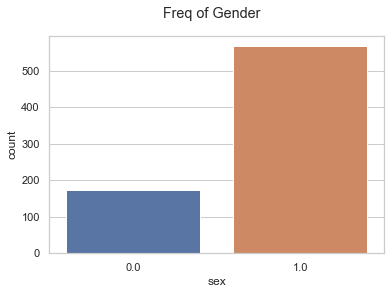

In [59]:
sns.countplot(x='sex', data=df_clean)
plt.suptitle('Freq of Gender')

In [64]:
print(df_clean['diagnosis'].unique())
df_clean['diagnosis'].value_counts(sort=False, normalize=True)

[0, 2, 1, 3, 4]
Categories (5, int64): [0, 2, 1, 3, 4]


0    0.481781
1    0.276653
2    0.106613
3    0.105263
4    0.029690
Name: diagnosis, dtype: float64

Text(0.5, 0.98, 'Freq dist of Diagnosis state')

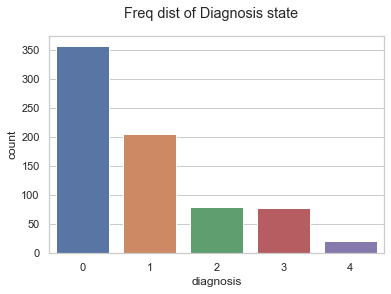

In [66]:
sns.countplot(x='diagnosis', data=df_clean)
plt.suptitle("Freq dist of Diagnosis state")

In [68]:
df_clean['age'].describe()

count    741.000000
mean      53.099865
std        9.402028
min       28.000000
25%       46.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

Text(0.5, 0.98, 'Dist of Age')

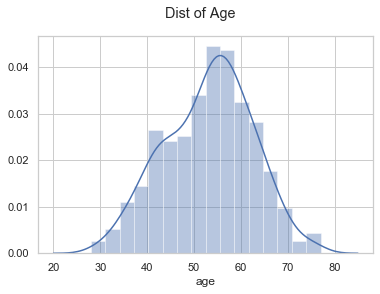

In [72]:
sns.distplot(df_clean['age'])
plt.suptitle('Dist of Age')

In [74]:
df_clean['max_heart_rate'].describe()

count    741.000000
mean     138.740891
std       25.828809
min       60.000000
25%      120.000000
50%      140.000000
75%      159.000000
max      202.000000
Name: max_heart_rate, dtype: float64

Text(0.5, 0.98, 'Dist of MHR')

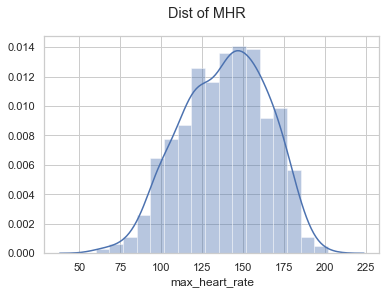

In [76]:
sns.distplot(df_clean['max_heart_rate'])
plt.suptitle('Dist of MHR')

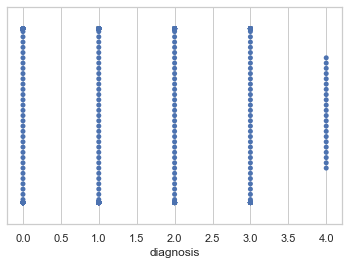

In [78]:
sns.swarmplot('diagnosis', data=df_clean)

**visualizing 2 variables:**

C-Q: use sns.catplot(x, y, kind='bar', data)
Q-Q: sns.regplot()
C-C: 


Text(0.5, 0.98, 'Sex by Age')

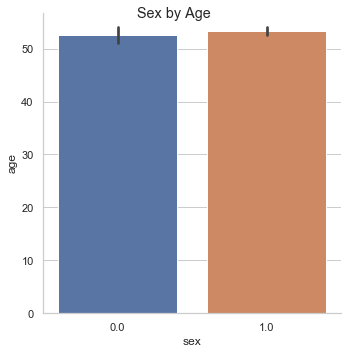

In [81]:
sns.catplot(x='sex', y='age', kind='bar', data=df_clean)
plt.suptitle('Sex by Age')

Text(0.5, 0.98, 'Sex by rest_bp')

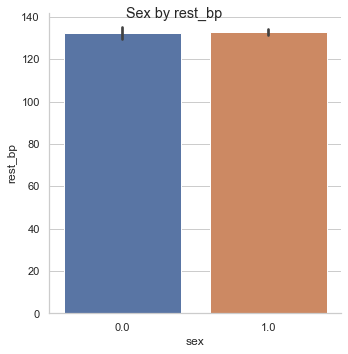

In [82]:
sns.catplot(x='sex', y='rest_bp', kind='bar', data=df_clean)
plt.suptitle('Sex by rest_bp')

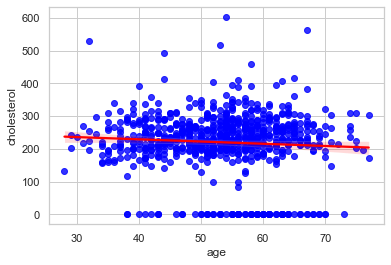

In [89]:
sns.regplot('age', 'cholesterol', data=df_clean, color='blue', line_kws={'color':'red'})

In [90]:
df_clean.groupby('sex')['diagnosis'].value_counts()/len(df_clean)

sex  diagnosis
0.0  0            0.176788
     1            0.035088
     3            0.010796
     2            0.009447
     4            0.002699
1.0  0            0.304993
     1            0.241565
     2            0.097166
     3            0.094467
     4            0.026991
Name: diagnosis, dtype: float64

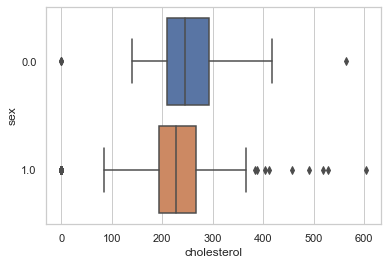

In [97]:
sns.boxplot(x='cholesterol', y='sex', data=df_clean)

In [107]:
df_clean.groupby('diagnosis').describe()

age                                                      rest_bp  \
           count       mean       std   min    25%   50%    75%   max   count   
diagnosis                                                                       
0          357.0  50.302521  9.417789  28.0  43.00  51.0  57.00  76.0   357.0   
1          205.0  52.946341  8.577333  31.0  47.00  54.0  59.00  75.0   205.0   
2           79.0  58.430380  7.041422  42.0  55.00  59.0  63.00  74.0    79.0   
3           78.0  59.179487  7.870285  39.0  54.00  60.0  64.00  77.0    78.0   
4           22.0  59.227273  8.286143  38.0  56.25  60.5  63.75  77.0    22.0   

                       ... max_heart_rate        st_depression            \
                 mean  ...            75%    max         count      mean   
diagnosis              ...                                                 
0          129.871148  ...          168.0  202.0         357.0  0.425210   
1          134.502439  ...          150.0  195.0         205.0  1.088293   
2          135.392405  ...          144.0  180.0          79.0  1.394937   
3          136.102564  ...          140.0  173.0          78.0  1.598718   
4          142.227273  ...          145.0  182.0          22.0  2.363636   

                                                
                std  min   25%  50%   75%  max  
diagnosis                                       
0          0.712199 -0.5  0.00  0.0  0.80  4.2  
1          1.021369  0.0  0.00  1.0  2.00  5.0  
2          1.204787 -1.0  0.00  1.4  2.10  4.0  
3          1.352006  0.0  0.50  1.5  2.15  6.2  
4          1.283798  0.0  1.25  2.5  3.45  4.4  

[5 rows x 40 columns]

In [100]:
df_copy = df_clean.copy()

# Inferential Stats

**Tests for independence:**
- ANOVA: DV: continuous, IV: categorical
- Chi^2: DV: Categorical IV: either
- Correlations: DV & IV: continuous

In [108]:
test1 = smf.ols(formula='age ~ C(diagnosis)', data=df_copy).fit()
print(test1.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     28.42
Date:                Sun, 03 May 2020   Prob (F-statistic):           5.56e-22
Time:                        16:08:28   Log-Likelihood:                -2658.2
No. Observations:                 741   AIC:                             5326.
Df Residuals:                     736   BIC:                             5350.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            50.3025      0.46

In [110]:
grouped1_mean = df_copy.groupby('diagnosis').mean()['age']
print(grouped1_mean)

diagnosis
0    50.302521
1    52.946341
2    58.430380
3    59.179487
4    59.227273
Name: age, dtype: float64


In [111]:
grouped1_std = df_copy.groupby('diagnosis').std()['age']
print(grouped1_std)

diagnosis
0    9.417789
1    8.577333
2    7.041422
3    7.870285
4    8.286143
Name: age, dtype: float64


In [112]:
tuckey1 = multi.MultiComparison(df_copy['age'], df_copy['diagnosis'])
res1 = tuckey1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   2.6438 0.0056  0.5412  4.7464   True
     0      2   8.1279  0.001  5.1446 11.1111   True
     0      3    8.877  0.001  5.8781 11.8758   True
     0      4   8.9248  0.001   3.654 14.1955   True
     1      2    5.484  0.001  2.3067  8.6614   True
     1      3   6.2331  0.001  3.0411  9.4252   True
     1      4   6.2809 0.0128   0.898 11.6639   True
     2      3   0.7491    0.9 -3.0808   4.579  False
     2      4   0.7969    0.9 -4.9872  6.5809  False
     3      4   0.0478    0.9 -5.7443  5.8399  False
----------------------------------------------------


In [113]:
## does chest pain predict diagnosis?
## first we need to transform some features

## Diag vs non
diag_dict = {0:0, 1:1, 2:1, 3:1, 4:1}
df_copy['diagnostic_binary'] = df_copy['diagnosis'].map(diag_dict)
df_copy.head()


,age,sex,chest_pain,rest_bp,cholesterol,fasting_bs,rest_ecg,max_heart_rate,exercise_angina,st_depression,diagnosis,diagnostic_binary
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0,0


In [117]:
# create a fequency table by binary diagnosis
ct1 = pd.crosstab(df_copy['diagnostic_binary'], df_copy['chest_pain'])
print(ct1)

chest_pain         1.0  2.0  3.0  4.0
diagnostic_binary                    
0                   23  128  112   94
1                   15   22   49  298


In [118]:
# and in percent
colsum = ct1.sum(axis=0)
colpct = ct1/colsum
print(colpct)

chest_pain              1.0       2.0       3.0       4.0
diagnostic_binary                                        
0                  0.605263  0.853333  0.695652  0.239796
1                  0.394737  0.146667  0.304348  0.760204


In [120]:
## now Chi^2 test

cs1 = scipy.stats.chi2_contingency(ct1)
print(cs1)

(206.69693667917477, 1.5066891002705367e-44, 3, array([[ 18.30769231,  72.26720648,  77.56680162, 188.8582996 ],
       [ 19.69230769,  77.73279352,  83.43319838, 203.1417004 ]]))


In [122]:
## diag by sex
## contingency table

ct2 = pd.crosstab(df_copy['diagnostic_binary'], df_copy['sex'])
print(ct2)

sex                0.0  1.0
diagnostic_binary          
0                  131  226
1                   43  341


In [123]:
cs2 = scipy.stats.chi2_contingency(ct2)
print(cs2)

(65.52382346167634, 5.741569147761909e-16, 1, array([[ 83.82995951, 273.17004049],
       [ 90.17004049, 293.82995951]]))


In [130]:
## let's look for lurking variables (sex) in explaining chestpain and diag

df_copy_men = df_copy[df_copy['sex'] == 0]
df_copy_women = df_copy[df_copy['sex'] == 1]

In [133]:
ct_m = pd.crosstab(df_copy_men['diagnostic_binary'], df_copy_men['chest_pain'])
ct_w = pd.crosstab(df_copy_women['diagnostic_binary'], df_copy_women['chest_pain'])

In [134]:
cs_m = scipy.stats.chi2_contingency(ct_m)
cs_w = scipy.stats.chi2_contingency(ct_w)

print(cs_m)
print(cs_w)

## sex is not a moderator

(39.896349270579876, 1.1207983387044401e-08, 3, array([[ 6.77586207, 38.39655172, 37.64367816, 48.18390805],
       [ 2.22413793, 12.60344828, 12.35632184, 15.81609195]]))
(153.13334878752136, 5.556477341199484e-33, 3, array([[ 11.55908289,  39.46031746,  44.24338624, 130.7372134 ],
       [ 17.44091711,  59.53968254,  66.75661376, 197.2627866 ]]))


In [136]:
df_copy_women.groupby('chest_pain')['diagnosis'].value_counts()

chest_pain  diagnosis
1.0         0             14
            1              9
            2              3
            3              2
            4              1
2.0         0             81
            1             14
            2              2
            3              2
3.0         0             68
            1             22
            3             11
            2              8
            4              2
4.0         1            134
            0             63
            2             59
            3             55
            4             17
Name: diagnosis, dtype: int64

In [146]:
## let's test the correlation between Age and Cholesterol
scipy.stats.pearsonr(df_copy['age'], df_copy['cholesterol'])

## what if we remove those suspicious 0 values for Cholesterol?
scipy.stats.pearsonr(df_copy[df_copy['cholesterol'] > 0]['age'], df_copy[df_copy['cholesterol'] > 0]['cholesterol'])

(0.09596603232408779, 0.013504445343445172)

# Linear and Logistic Regressions

In [147]:
## recode chestpain to include a zero
cp_recode = {1:0, 2:1, 3:2, 4:3}
df_copy['chest_pain'] = df_copy['chest_pain'].map(cp_recode)


In [162]:
## Let's mean center our continuous variables for interpretability

#df_copy['age_c rest_bp_c chol_c MHR_c st_depress_c'.split()] = df_copy['age rest_bp cholesterol max_heart_rate st_depression'.split()].apply(
#lambda x: x - x.mean())

741 741


In [163]:
model1 = smf.ols(formula = 'age_c ~ sex', data=df_copy).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  age_c   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8054
Date:                Sun, 03 May 2020   Prob (F-statistic):              0.370
Time:                        17:12:45   Log-Likelihood:                -2711.1
No. Observations:                 741   AIC:                             5426.
Df Residuals:                     739   BIC:                             5435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5596      0.713     -0.785      0.4

In [165]:
## now let's add cholesterol

model2 = smf.ols(formula = 'age_c ~ sex + chol_c', data=df_copy).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  age_c   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.889
Date:                Sun, 03 May 2020   Prob (F-statistic):              0.152
Time:                        17:15:15   Log-Likelihood:                -2709.6
No. Observations:                 741   AIC:                             5425.
Df Residuals:                     738   BIC:                             5439.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3644      0.721     -0.506      0.6

In [175]:
## and now even more stuff
df_copy.head()
model3 = smf.ols(formula = 'age_c ~ sex + C(chest_pain) + (rest_bp_c) + chol_c + fasting_bs + C(rest_ecg) + \
                            MHR_c + exercise_angina + st_depress_c + diagnostic_binary', 
                 data=df_copy).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  age_c   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     21.58
Date:                Sun, 03 May 2020   Prob (F-statistic):           1.25e-43
Time:                        17:21:01   Log-Likelihood:                -2590.6
No. Observations:                 741   AIC:                             5209.
Df Residuals:                     727   BIC:                             5274.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

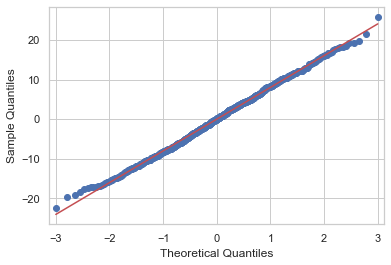

In [176]:
## Q-Q plots to see if the residules are normally distributed

fig1 = sm.qqplot(model3.resid, line='r')

Text(0.5, 0, 'Observation Number')

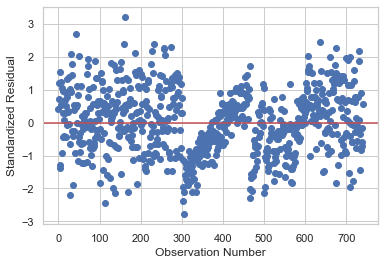

In [178]:
## let's plot the residules
## looks like the model doesn't really help explain the variability in the data


stdres = pd.DataFrame(model3.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')

Figure(432x288)
age                        59
sex                         1
chest_pain                  3
rest_bp                   135
cholesterol               234
fasting_bs                  0
rest_ecg                    0
max_heart_rate            161
exercise_angina             0
st_depression             0.5
diagnosis                   0
diagnostic_binary           0
age_c                 5.90013
rest_bp_c             2.23617
chol_c                13.7625
MHR_c                 22.2591
st_depress_c        -0.393117
Name: 33, dtype: object


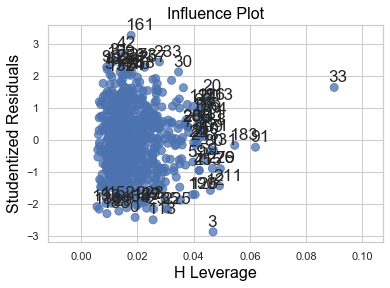

In [181]:
## a Leverage plot helps identify particularly impactful datapoints

fig4 = sm.graphics.influence_plot(model3, size=8)
print(fig4)
## What's up with 33?
print(df_copy.iloc[33])
## maybe diagnosis == 0 and some off effects?


In [183]:
## let's predict diagnosis from chestpain with Logistic regression

lreg1 = smf.logit(formula='diagnostic_binary ~ C(chest_pain)', data=df_copy).fit()
print(lreg1.summary())


Optimization terminated successfully.
         Current function value: 0.543711
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      diagnostic_binary   No. Observations:                  741
Model:                          Logit   Df Residuals:                      737
Method:                           MLE   Df Model:                            3
Date:                Sun, 03 May 2020   Pseudo R-squ.:                  0.2148
Time:                        17:33:02   Log-Likelihood:                -402.89
converged:                       True   LL-Null:                       -513.13
Covariance Type:            nonrobust   LLR p-value:                 1.581e-47
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.4274      0.332     -1.288      0.198      -1.078       0.223
C(che

In [187]:
## and now a Logit full model

lreg2 = smf.logit(formula='diagnostic_binary ~ age_c + sex + C(chest_pain) + rest_bp_c + \
                  chol_c + fasting_bs + C(rest_ecg) + MHR_c + \
                  exercise_angina + st_depress_c', data = df_copy).fit()
print(lreg2.summary())

Optimization terminated successfully.
         Current function value: 0.421593
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      diagnostic_binary   No. Observations:                  741
Model:                          Logit   Df Residuals:                      727
Method:                           MLE   Df Model:                           13
Date:                Sun, 03 May 2020   Pseudo R-squ.:                  0.3912
Time:                        17:36:39   Log-Likelihood:                -312.40
converged:                       True   LL-Null:                       -513.13
Covariance Type:            nonrobust   LLR p-value:                 1.100e-77
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.9267      0.465     -4.139      0.000      -2.839      

In [192]:
## let's talk about the Odds Ratios of the coefficients

print('Odds Ratios')
#print(np.exp(lreg2.params))

## and only significant predictors?
print(np.exp(lreg2.params[lreg2.pvalues< 0.05]))



Odds Ratios
Intercept                 0.145625
sex[T.1.0]                3.706415
C(chest_pain)[T.3]        3.672428
exercise_angina[T.1.0]    2.732984
MHR_c                     0.985909
st_depress_c              1.851057
dtype: float64


In [195]:
## and with 95% confidence intervals?

params = lreg2.params
conf = lreg2.conf_int()
conf['OR'] = params
conf.columns = 'lower_CI upper_CI Odds_Ratio'.split()
print(np.exp(conf))

                        lower_CI  upper_CI  Odds_Ratio
Intercept               0.058480  0.362629    0.145625
sex[T.1.0]              2.242497  6.125988    3.706415
C(chest_pain)[T.1]      0.224975  1.463965    0.573894
C(chest_pain)[T.2]      0.364589  2.068857    0.868495
C(chest_pain)[T.3]      1.580165  8.535010    3.672428
fasting_bs[T.1.0]       0.938503  2.944433    1.662336
C(rest_ecg)[T.1.0]      0.506524  1.656603    0.916029
C(rest_ecg)[T.2.0]      0.769914  2.072760    1.263268
exercise_angina[T.1.0]  1.737951  4.297705    2.732984
age_c                   0.997020  1.047468    1.021933
rest_bp_c               0.995035  1.017583    1.006246
chol_c                  0.995907  1.000445    0.998173
MHR_c                   0.977157  0.994740    0.985909
st_depress_c            1.480481  2.314391    1.851057


# Machine Learning examples

In [199]:
## first we need to recode our categorical variables through separate columns for each one

df_sex = pd.get_dummies(df_copy['sex'], prefix='sex')
df_chest_pain = pd.get_dummies(df_copy['chest_pain'], prefix = 'chest_pain')
df_fasting_bs = pd.get_dummies(df_copy['fasting_bs'], prefix = 'fasting_bs')
df_rest_ecg = pd.get_dummies(df_copy['rest_ecg'], prefix = 'rest_ecg')
df_exercise_angina = pd.get_dummies(df_copy['exercise_angina'], prefix = 'exercise_angina')

In [202]:
df_merg = pd.concat([df_copy, df_sex, df_chest_pain, df_fasting_bs, df_rest_ecg, df_exercise_angina], 
                    axis=1)

In [206]:
df_merg.columns



Index(['age', 'sex', 'chest_pain', 'rest_bp', 'cholesterol', 'fasting_bs',
       'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression',
       'diagnosis', 'diagnostic_binary', 'age_c', 'rest_bp_c', 'chol_c',
       'MHR_c', 'st_depress_c', 'sex_0.0', 'sex_1.0', 'chest_pain_0',
       'chest_pain_1', 'chest_pain_2', 'chest_pain_3', 'fasting_bs_0.0',
       'fasting_bs_1.0', 'rest_ecg_0.0', 'rest_ecg_1.0', 'rest_ecg_2.0',
       'exercise_angina_0.0', 'exercise_angina_1.0'],
      dtype='object')

In [209]:
df_dt = df_merg[['age', 'sex_0.0', 'sex_1.0', 'chest_pain_0', 'chest_pain_1', 'chest_pain_2', \
                       'chest_pain_3', 'rest_bp', 'cholesterol', 'fasting_bs_0.0', 'fasting_bs_1.0', \
                      'rest_ecg_1.0', 'rest_ecg_2.0', 'max_heart_rate', 'exercise_angina_0.0', 'exercise_angina_1.0',\
                       'st_depression', 'diagnostic_binary']]

In [210]:
preds = df_dt.iloc[:, df_dt.columns != 'diagnostic_binary']

In [211]:
preds.head()

,age,sex_0.0,sex_1.0,chest_pain_0,chest_pain_1,chest_pain_2,chest_pain_3,rest_bp,cholesterol,fasting_bs_0.0,fasting_bs_1.0,rest_ecg_1.0,rest_ecg_2.0,max_heart_rate,exercise_angina_0.0,exercise_angina_1.0,st_depression
0,63.0,0,1,1,0,0,0,145.0,233.0,0,1,0,1,150.0,1,0,2.3
1,67.0,0,1,0,0,0,1,160.0,286.0,1,0,0,1,108.0,0,1,1.5
2,67.0,0,1,0,0,0,1,120.0,229.0,1,0,0,1,129.0,0,1,2.6
3,37.0,0,1,0,0,1,0,130.0,250.0,1,0,0,0,187.0,1,0,3.5
4,41.0,1,0,0,1,0,0,130.0,204.0,1,0,0,1,172.0,1,0,1.4


In [213]:
target = df_dt['diagnostic_binary']

In [214]:
## make train | test datasets with train_test_split with 40% withheld

pred_train, pred_test, tar_train, tar_test = train_test_split(preds, target, test_size=0.4)

In [215]:
## create a Decision Tree classifier
classifier = DecisionTreeClassifier()

## train it
classifier = classifier.fit(pred_train, tar_train)

In [216]:
predictions = classifier.predict(pred_test)

In [217]:
sklearn.metrics.confusion_matrix(tar_test, predictions)

array([[103,  50],
       [ 39, 105]], dtype=int64)

In [223]:
## print out the classifier feature importance
print(classifier.feature_importances_)
preds.columns[6:9]

[0.04815955 0.         0.02644818 0.         0.         0.00604575
 0.29362468 0.10728985 0.22380942 0.01391817 0.00151144 0.0294938
 0.00816176 0.09706573 0.00604575 0.04646747 0.09195845]


Index(['chest_pain_3', 'rest_bp', 'cholesterol'], dtype='object')

In [224]:
sklearn.metrics.accuracy_score(tar_test, predictions)
## meh.

0.7003367003367004

In [225]:
classifier2 = RandomForestClassifier(n_estimators = 25)
classifier2 = classifier2.fit(pred_train, tar_train)

In [226]:
predictions2 = classifier2.predict(pred_test)

In [227]:
sklearn.metrics.confusion_matrix(tar_test, predictions2)

array([[117,  36],
       [ 31, 113]], dtype=int64)

In [229]:
print(classifier2.feature_importances_)

[0.09898262 0.02385101 0.03302334 0.01274836 0.02296066 0.01862389
 0.14129432 0.08850399 0.12158881 0.01174301 0.01165562 0.02801664
 0.01349725 0.14955157 0.03473585 0.08529199 0.10393108]


In [230]:
sklearn.metrics.accuracy_score(tar_test, predictions2)
# a bit better

0.7744107744107744

In [236]:
from sklearn import svm

classifier3 = svm.SVC()
classifier3 = classifier3.fit(pred_train, tar_train)

In [232]:
predictions3 = classifier3.predict(pred_test)

In [238]:
sklearn.metrics.confusion_matrix(tar_test, predictions3)

array([[102,  51],
       [ 38, 106]], dtype=int64)

In [237]:
sklearn.metrics.accuracy_score(tar_test, predictions3)

0.7003367003367004

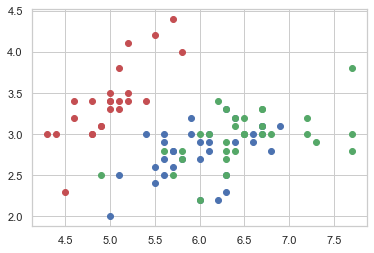

0.4666666666666667


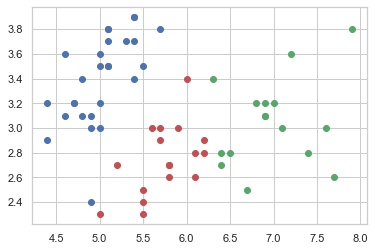

In [400]:
## K-means on Age
from sklearn.cluster import KMeans

iris = pd.read_csv('../iris.data', header=None)

iris_map = {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}
iris[5] = iris[4].map(iris_map)

#print(iris.iloc[:, 0:4])

pred_train, pred_test, tar_train, tar_test = train_test_split(iris.iloc[:, 0:2], iris.iloc[:, 5], test_size=0.4)

# train = pd.DataFrame({'x': pred_train, 'y':tar_train})
# test = pd.DataFrame({'x': pred_test, 'y':tar_test})

# train.head()
# test.head()
#print(pred_train.loc[tar_train==1, :])
#print(tar_train==1)

plt.plot(pred_train.loc[tar_train == 1, 0], pred_train.loc[tar_train == 1, 1], 'ro')
plt.plot(pred_train.loc[tar_train == 2, 0], pred_train.loc[tar_train == 2, 1], 'bo')
plt.plot(pred_train.loc[tar_train == 3, 0], pred_train.loc[tar_train == 3, 1], 'go')
plt.show()

kmeans = KMeans(n_clusters=3, n_jobs=4, random_state=21)
kmeans.fit(pred_train)

Kpred = kmeans.predict(pred_test)

sklearn.metrics.confusion_matrix(tar_test, Kpred)
print(sklearn.metrics.accuracy_score(tar_test, Kpred))
centroids = kmeans.cluster_centers_

plt.plot(pred_test.loc[Kpred == 0, 0], pred_test.loc[Kpred == 0, 1], 'ro')
plt.plot(pred_test.loc[Kpred == 1, 0], pred_test.loc[Kpred == 1, 1], 'bo')
plt.plot(pred_test.loc[Kpred == 2, 0], pred_test.loc[Kpred == 2, 1], 'go')
plt.show()
